#### 1. Import Libraies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#### 2. Load DataSets to Pandas DataFrame

In [6]:
df = pd.read_csv('dataset/bmx.csv')
df.head()

# ເລືອກສະເພາະ column ທີຕ້ອງການ ແລະ ລືບ missing value Nan ອອກ
df = df[['bmxleg','bmxwaist']].dropna()
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Index: 6899 entries, 0 to 9337
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   bmxleg    6899 non-null   float64
 1   bmxwaist  6899 non-null   float64
dtypes: float64(2)
memory usage: 161.7 KB


,bmxleg,bmxwaist
0,40.2,81.0
2,40.3,64.6
3,40.5,80.1
4,42.1,86.7
5,31.0,59.8
...,...,...
9333,39.0,104.4
9334,39.4,79.0
9335,35.6,59.6
9336,32.9,106.6


#### 3. Create Model Object KMeanClustering

In [7]:
model = KMeans(n_clusters=4,random_state=0)

#### 4. Train Model

In [8]:
model.fit(df)

# Get the centroids
centroids = model.cluster_centers_

print('Centroids:\n', centroids)

e:\COURS\TRAINNING\2023-08\PYTHON\PythonDABCEL\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Centroids:
 [[ 38.72615054  85.03612903]
 [ 38.60022548 124.05377678]
 [ 38.88927614 102.1411975 ]
 [ 36.04064872  67.30131125]]


#### 5. Prediction

In [10]:
# ນຳຂໍ້ມູນແຕ່ລະຕຳແໜງໄປທຳນາຍວ່າຢູ່ກຸ່ມໃດ
# ຊຶ່ງຈະໄດ້ຜົນລັບເປັນອາເລຂອງລຳດັບກຸ່ມຂອງຂໍ້ມູນແຕ່ລະຕຳແໜ່ງ

clusters = model.predict(df)

# ສະແດງຜົນລັບ
print(clusters)

[0 3 0 ... 3 2 3]


#### 6. Plot Graph check Centroid

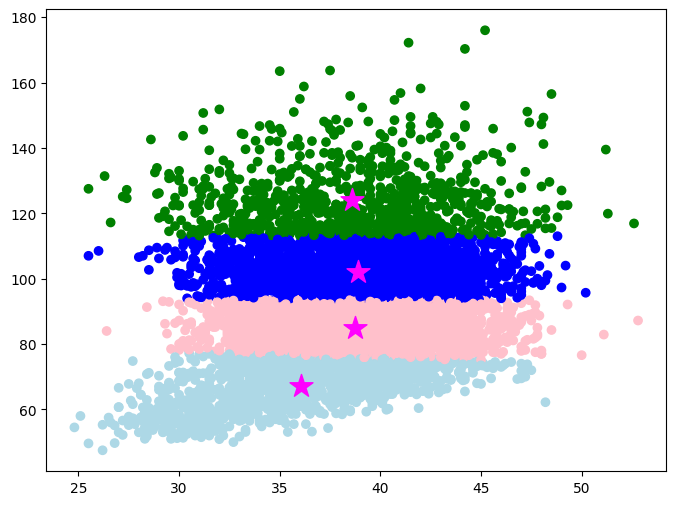

In [26]:
# ກຳນົດສີຂອງແຕ່ລະກຸ່ມ ຕາມຄ່າ K ຫລື n_clusters
cluster_colors = ['pink','green','blue','lightblue']

# ເກັບສີຂອງຂໍ້ມູນໃນແຕ່ລະຕຳແໜ໋ງຕາມກຸ່ມຂອງມັນ
data_colors = []

for i in clusters:
    data_colors.append(cluster_colors[i])

# ກຳນົດຂະໜາດອງແຕ່ລະຂໍ້ມູນ
plt.figure(figsize=(8,6))

# ແຕ້ມຕຳແໜ່ງຂໍ້ມູນມູນ ໂດຍໃຫ້ແກນ x ເປັນຄ່າ bxmleg ແລະ ແກນ y ເປັນ bxmwaist
plt.scatter(df['bmxleg'],df['bmxwaist'],color=data_colors)

# ແຕ້ມຕຳແໜ່ງຂໍ້ມູນມູນ ໂດຍໃຫ້ແກນ x ເປັນຄ່າ bxmleg ແລະ ແກນ y ເປັນ bxmwaist
plt.scatter(centroids[:,0],centroids[:,1],marker='*',color='Magenta',s=300)

# ສະແດງຜົນ
plt.show()


#### 7. Export the model

In [27]:
from joblib import dump

#Save the model as a pickle in a file
dump(model,'bmx_kmean.joblib')

['bmx_kmean.joblib']